In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	3
float64		column 3	0
float64		column 4	3
float64		column 5	3
float64		column 6	6
float64		column 7	0
float64		column 8	6
float64		column 9	3
float64		column 10	0
float64		column 11	3
float64		column 12	3
float64		column 13	0
float64		column 14	6
float64		column 15	0
float64		column 16	3
float64		column 17	6
float64		column 18	3
float64		column 19	0
float64		column 20	3
float64		column 21	3
float64		column 22	0
float64		column 23	0
float64		column 24	12
float64		column 25	3
float64		column 26	6
float64		column 27	6
float64		column 28	6
float64		column 29	0
float64		column 30	0
float64		column 31	3
float64		column 32	3
float64		column 33	3
float64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,348.0,351.000000,348.000000,348.000000,345.000000,351.000000,345.000000,348.000000,351.000000,...,348.000000,345.000000,345.000000,345.000000,351.000000,351.000000,348.000000,348.000000,348.000000,351.000000
mean,0.891738,0.0,0.641342,0.043316,0.598319,0.117344,0.550095,0.115160,0.508902,0.181345,...,0.391575,-0.075801,0.541044,-0.066880,0.378445,-0.027907,0.353708,-0.007355,0.352375,0.014480
std,0.311155,0.0,0.497708,0.442784,0.521215,0.459736,0.492654,0.515672,0.508208,0.483851,...,0.578762,0.501252,0.514573,0.547379,0.575886,0.507974,0.573355,0.509627,0.518373,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064083,0.410318,-0.024650,0.211310,-0.055630,0.084792,-0.048075,...,0.000000,-0.331450,0.292080,-0.422310,0.000000,-0.236885,0.000000,-0.242197,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.015340,0.806830,0.022800,0.728730,0.013860,0.675015,0.018290,...,0.540980,-0.015350,0.698450,-0.017690,0.496640,0.000000,0.446875,0.000000,0.413115,0.000000
75%,1.000000,0.0,1.000000,0.191142,1.000000,0.333330,0.969240,0.411760,0.952473,0.534195,...,0.900880,0.148030,0.998420,0.156190,0.883465,0.154075,0.861930,0.198430,0.810752,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

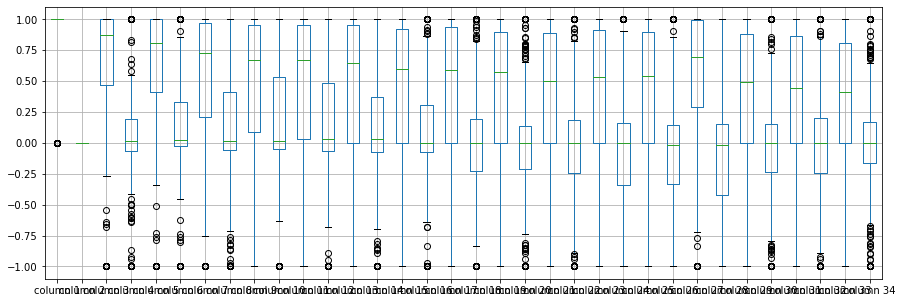

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.641342
column 4     0.043316
column 5     0.598319
column 6     0.117344
column 7     0.550095
column 8     0.115160
column 9     0.508902
column 10    0.181345
column 11    0.480339
column 12    0.153689
column 13    0.400801
column 14    0.091152
column 15    0.344159
column 16    0.072546
column 17    0.384058
column 18   -0.004667
column 19    0.359390
column 20   -0.018794
column 21    0.335865
column 22    0.008296
column 23    0.362475
column 24   -0.058348
column 25    0.391575
column 26   -0.075801
column 27    0.541044
column 28   -0.066880
column 29    0.378445
column 30   -0.027907
column 31    0.353708
column 32   -0.007355
column 33    0.352375
column 34    0.014480
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.302034,-0.007377,0.154651,0.107901,0.221867,0.039510,0.187698,-0.051883,...,0.014027,0.134664,-0.194164,-0.007072,0.133632,-0.121415,0.168022,-0.104638,0.167143,0.010788
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.302034,NaN,1.000000,0.142702,0.475112,0.028592,0.440254,-0.004013,0.470794,0.047916,...,0.302022,-0.066313,0.094933,0.144261,0.344459,0.057890,0.244974,-0.013072,0.253905,0.000584
column 4,-0.007377,NaN,0.142702,1.000000,-0.000179,-0.186665,-0.052855,0.226164,-0.301429,0.203849,...,-0.095070,-0.234783,-0.045328,0.018067,-0.038606,0.349390,-0.177315,-0.136450,-0.162764,0.037565
column 5,0.154651,NaN,0.475112,-0.000179,1.000000,0.039683,0.595487,-0.049999,0.446624,-0.033043,...,0.241669,-0.018653,0.152763,0.178417,0.256632,0.048214,0.398740,0.015154,0.366211,-0.102728
column 6,0.107901,NaN,0.028592,-0.186665,0.039683,1.000000,-0.017014,0.276799,-0.126957,0.193415,...,-0.172322,0.028296,-0.163922,-0.041975,-0.041224,-0.173182,-0.106620,0.324417,0.033597,0.189342
column 7,0.221867,NaN,0.440254,-0.052855,0.595487,-0.017014,1.000000,-0.155833,0.459775,-0.090268,...,0.288261,0.086216,0.100274,0.128015,0.300632,-0.015158,0.413749,-0.010559,0.535910,-0.076460
column 8,0.039510,NaN,-0.004013,0.226164,-0.049999,0.276799,-0.155833,1.000000,-0.332879,0.375909,...,-0.195766,-0.111312,-0.271492,0.073529,-0.158929,0.092374,-0.185589,0.161927,-0.212525,0.360589
column 9,0.187698,NaN,0.470794,-0.301429,0.446624,-0.126957,0.459775,-0.332879,1.000000,-0.249263,...,0.360037,0.114511,0.185717,0.151460,0.329585,-0.033150,0.317148,-0.074675,0.347401,-0.095387
column 10,-0.051883,NaN,0.047916,0.203849,-0.033043,0.193415,-0.090268,0.375909,-0.249263,1.000000,...,-0.257279,-0.046083,-0.249282,0.072677,-0.123296,-0.008578,-0.153860,-0.026402,-0.197500,0.098104


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+56,34+56+56,34+56+56+56,34+56+56+56+56,34+56+56+56,34+56+56,34+56,34], vae_layer = False, seed = 560)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 20.15675971621559
Epoch: 1 , loss: 20.18612916128976
Epoch: 2 , loss: 20.00684865315755
Epoch: 3 , loss: 20.05769257318406
Epoch: 4 , loss: 19.965727034069243
Epoch: 5 , loss: 19.95014962695894
Epoch: 6 , loss: 19.74475724356515
Epoch: 7 , loss: 19.523230961390905
Epoch: 8 , loss: 19.295454751877557
Epoch: 9 , loss: 18.732827776954288
Epoch: 10 , loss: 18.16377131144206
Epoch: 11 , loss: 17.951672099885485
Epoch: 12 , loss: 17.68558220636277
Epoch: 13 , loss: 17.65288016909645
Epoch: 14 , loss: 17.597699664887926
Epoch: 15 , loss: 17.71618466150193
Epoch: 16 , loss: 17.328460193815687
Epoch: 17 , loss: 17.658786909920828
Epoch: 18 , loss: 17.547373544602166
Epoch: 19 , loss: 17.479285648890905
Epoch: 20 , loss: 17.352172579084122
Epoch: 21 , loss: 17.17543415796189
Epoch: 22 , loss: 17.26755310240246
Epoch: 23 , loss: 17.465393565949938
Epoch: 24 , loss: 17.413803963434127
Epoch: 25 , loss: 17.28884424

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.0
column 2     0.0
column 3     1.0
column 4     1.0
column 5     0.0
column 6     0.0
column 7     0.0
column 8     0.0
column 9    -1.0
column 10   -1.0
column 11    0.0
column 12    0.0
column 13    0.0
column 14    0.0
column 15   -1.0
column 16   -1.0
column 17   -1.0
column 18   -1.0
column 19   -1.0
column 20    1.0
column 21   -1.0
column 22    1.0
column 23    0.0
column 24    0.0
column 25    0.0
column 26    0.0
column 27    1.0
column 28   -1.0
column 29   -1.0
column 30    1.0
column 31   -1.0
column 32    1.0
column 33   -1.0
column 34    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

5.838292258658428

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.08528013176770816

In [19]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_NE_1(imp).xlsx", index=False, header=False)